# SUYASH PRATAP SINGH(MI VS DC)

In [1]:
#Importing Libraries
import numpy as np 
import pandas as pd 
import matplotlib.pyplot as mlt
import seaborn as sns

In [2]:
# read Matches file
matches=pd.read_csv(r'C:\Users\Admin\Desktop\matches.csv') 
#print only the first 2 rows
matches.head(2)

,id,season,city,date,team1,team2,toss_winner,toss_decision,result,dl_applied,winner,win_by_runs,win_by_wickets,player_of_match,venue,umpire1,umpire2,umpire3
0,1,2017,Hyderabad,05-04-2017,Sunrisers Hyderabad,Royal Challengers Bangalore,Royal Challengers Bangalore,field,normal,0,Sunrisers Hyderabad,35,0,Yuvraj Singh,"Rajiv Gandhi International Stadium, Uppal",AY Dandekar,NJ Llong,NaN
1,2,2017,Pune,06-04-2017,Mumbai Indians,Rising Pune Supergiant,Rising Pune Supergiant,field,normal,0,Rising Pune Supergiant,0,7,SPD Smith,Maharashtra Cricket Association Stadium,A Nand Kishore,S Ravi,NaN


In [3]:
matches.shape

(756, 18)

In [4]:
team1 = ["Mumbai Indians","Delhi Capitals"]
team2 =["Mumbai Indians","Delhi Capitals"]
yo=matches[matches["team1"].isin(team1)][matches["team2"].isin(team2)]
yo

<ipython-input-4-f64726f84b65>:3: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  yo=matches[matches["team1"].isin(team1)][matches["team2"].isin(team2)]


,id,season,city,date,team1,team2,toss_winner,toss_decision,result,dl_applied,winner,win_by_runs,win_by_wickets,player_of_match,venue,umpire1,umpire2,umpire3
698,11139,2019,Mumbai,24-03-2019,Delhi Capitals,Mumbai Indians,Mumbai Indians,field,normal,0,Delhi Capitals,37,0,RR Pant,Wankhede Stadium,S Ravi,Yeshwant Barde,O Nandan
729,11325,2019,Delhi,18-04-2019,Mumbai Indians,Delhi Capitals,Mumbai Indians,bat,normal,0,Mumbai Indians,40,0,HH Pandya,Feroz Shah Kotla Ground,Nigel Llong,Bruce Oxenford,Anil Chaudhary


In [6]:
yo.shape

(2, 18)

In [7]:
matches=yo

In [8]:
#read Delivery file
delivery=pd.read_csv(r'C:\Users\Admin\Desktop\mumbai vs delhi.csv') 
 #print only the first 2 rows
delivery.head(2)

,match_id,inning,batting_team,bowling_team,over,ball,batsman,non_striker,bowler,is_super_over,...,bye_runs,legbye_runs,noball_runs,penalty_runs,batsman_runs,extra_runs,total_runs,player_dismissed,dismissal_kind,fielder
0,7948,1,Delhi Daredevils,Mumbai Indians,1,1,P Shaw,GJ Maxwell,KH Pandya,0,...,0,0,0,0,1,0,1,NaN,NaN,NaN
1,7948,1,Delhi Daredevils,Mumbai Indians,1,2,GJ Maxwell,P Shaw,KH Pandya,0,...,0,2,0,0,2,2,4,NaN,NaN,NaN


In [9]:
#--> finding the number of matches played in total
print ("Total number of matches played:", len(yo))
#--> Location of Matches, name of teams that played and the name of unique umpires
print(' \n Location for all matches: \n',yo['city'].unique(), ' \n \n Teams :',yo['team1'].unique(), '\n \nTotal umpires ',yo['umpire1'].unique())

Total number of matches played: 2
 
 Location for all matches: 
 ['Mumbai' 'Delhi']  
 
 Teams : ['Delhi Capitals' 'Mumbai Indians'] 
 
Total umpires  ['S Ravi' 'Nigel Llong']


In [10]:
a= yo['player_of_match'].value_counts()
b= a.idxmax()

print(' Who has the highest man of the match awards?\n', b)

c= yo['winner'].value_counts()
d=c.idxmax()
print(' Which team has won the most?\n', d)

 Who has the highest man of the match awards?
 HH Pandya
 Which team has won the most?
 Mumbai Indians


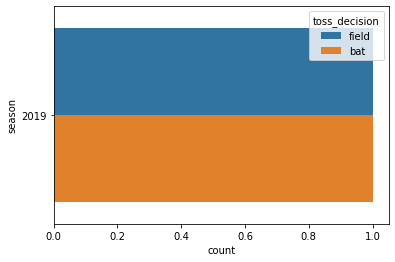

In [11]:
#--> The graph will show the decision of fielding or batting if a team wins the toss. 
sns.countplot(y='season',hue='toss_decision',data=matches)
mlt.show()

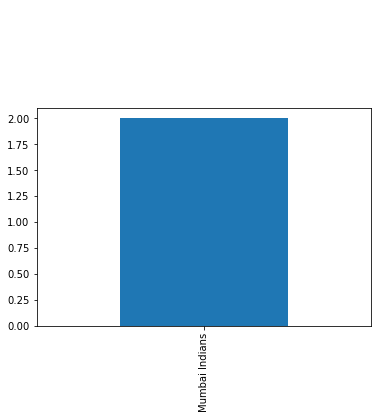

In [12]:
#--> The graph shows the team that won the most tosses
u=matches['toss_winner'].value_counts().plot.bar()
for l in u.patches:
    u.annotate(format(l.get_height()), (l.get_x()+0.15, l.get_height()+1))
mlt.show()

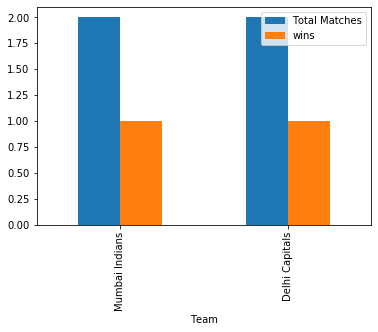

In [13]:
#--> The graph shows the team that won the most number of matches
u=pd.concat([matches['team1'],matches['team2']])
matches_played_byteams=u.value_counts().reset_index()
matches_played_byteams.columns=['Team','Total Matches']
matches_played_byteams['wins']=matches['winner'].value_counts().reset_index()['winner']
matches_played_byteams.set_index('Team',inplace=bool(2))
matches_played_byteams.plot.bar()
mlt.show()

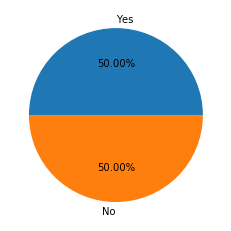

In [14]:
#--> Probability that the toss winner will win the match
z=matches[matches['toss_winner']==matches['winner']]
slices=[len(z),(len(matches)-len(z))]
labels=['Yes','No']
mlt.pie(slices,labels=labels,autopct='%1.2f%%')
fig = mlt.gcf()
mlt.show()

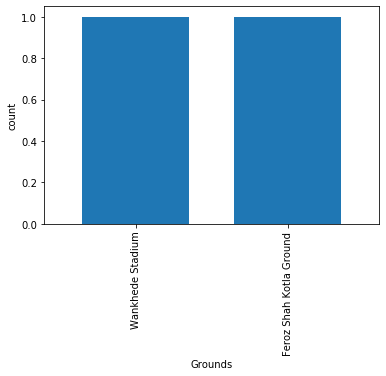

In [15]:
#--> Most popular grounds to play
ls = matches['venue'].value_counts().plot.bar(width=.7)
ls.set_xlabel('Grounds')
ls.set_ylabel('count')
mlt.show()

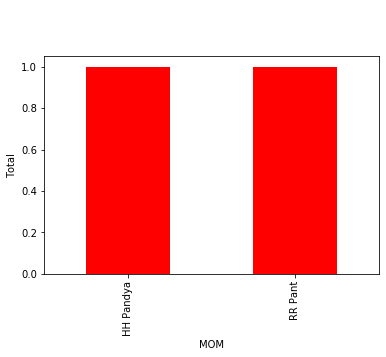

In [16]:
#--> The Graph shows the top 5 most Man of the match winners
pp = matches['player_of_match'].value_counts().head(5).plot.bar( color='Red')  
pp.set_xlabel('MOM') 
pp.set_ylabel('Total')
for p in pp.patches:
    pp.annotate(format(p.get_height()), (p.get_x()+0.15, p.get_height()+0.25))
mlt.show()

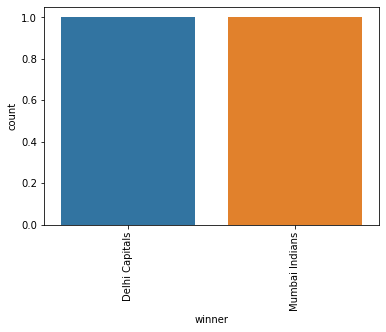

In [17]:
#--> Team that won the most
sns.countplot(x='winner', data=matches)
mlt.xticks(rotation='vertical')
mlt.show()

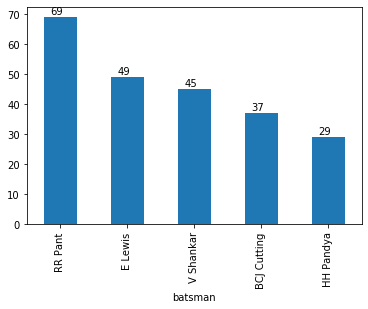

In [19]:
#--> Highest run scoring batsman (Top 5)
max_runs=delivery.groupby(['batsman'])['batsman_runs'].sum()
ax=max_runs.sort_values(ascending=False)[:5].plot.bar()
for p in ax.patches:
    ax.annotate(format(p.get_height()), (p.get_x()+0.1, p.get_height()+1))
mlt.show()

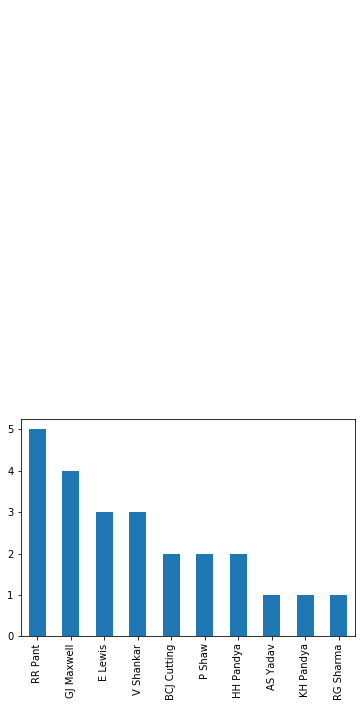

In [20]:
#--> Player that has scored the most number of fours
ax=delivery[delivery['batsman_runs']==4].batsman.value_counts()[:10].plot.bar()
for p in ax.patches:
    ax.annotate(format(p.get_height()), (p.get_x(), p.get_height()+10))
mlt.show()

In [25]:
#--> Orange cap winner each year with their total runs
orange=matches[['id','season']]
orange=orange.merge(delivery,left_on='id',right_on='match_id',how='left')
orange=orange.groupby(['season','batsman'])['batsman_runs'].sum().reset_index()
orange=orange.sort_values('batsman_runs',ascending=0)
orange=orange.drop_duplicates(subset=["season"])
orange.sort_values(by='season')

,season,batsman,batsman_runs


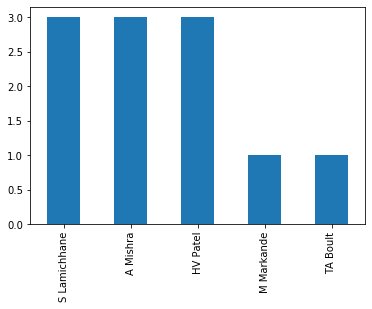

In [24]:
#--> Top 5 bowlers with most number of wickets
dismissal_kinds = ["bowled", "caught", "lbw", "stumped", "caught and bowled", "hit wicket"] 
yo=delivery[delivery["dismissal_kind"].isin(dismissal_kinds)]
zz=yo['bowler'].value_counts()[:5].plot.bar()
for p in zz.patches:
    zz
mlt.show()

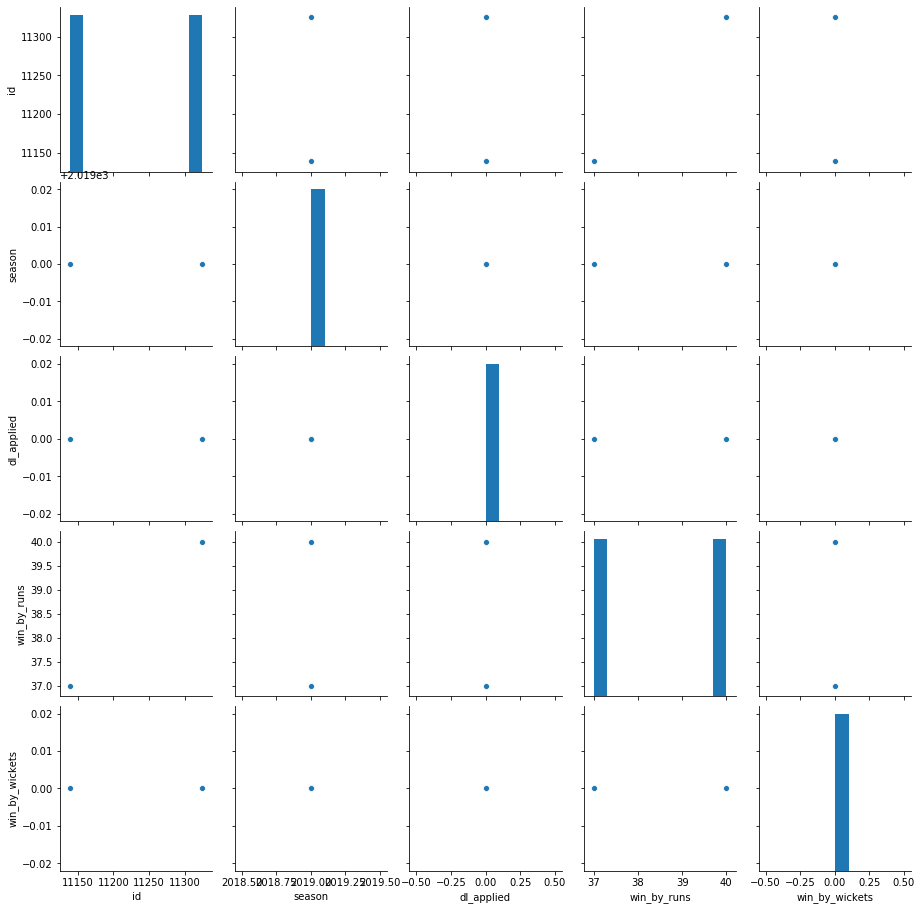

In [26]:
sns.pairplot(matches)

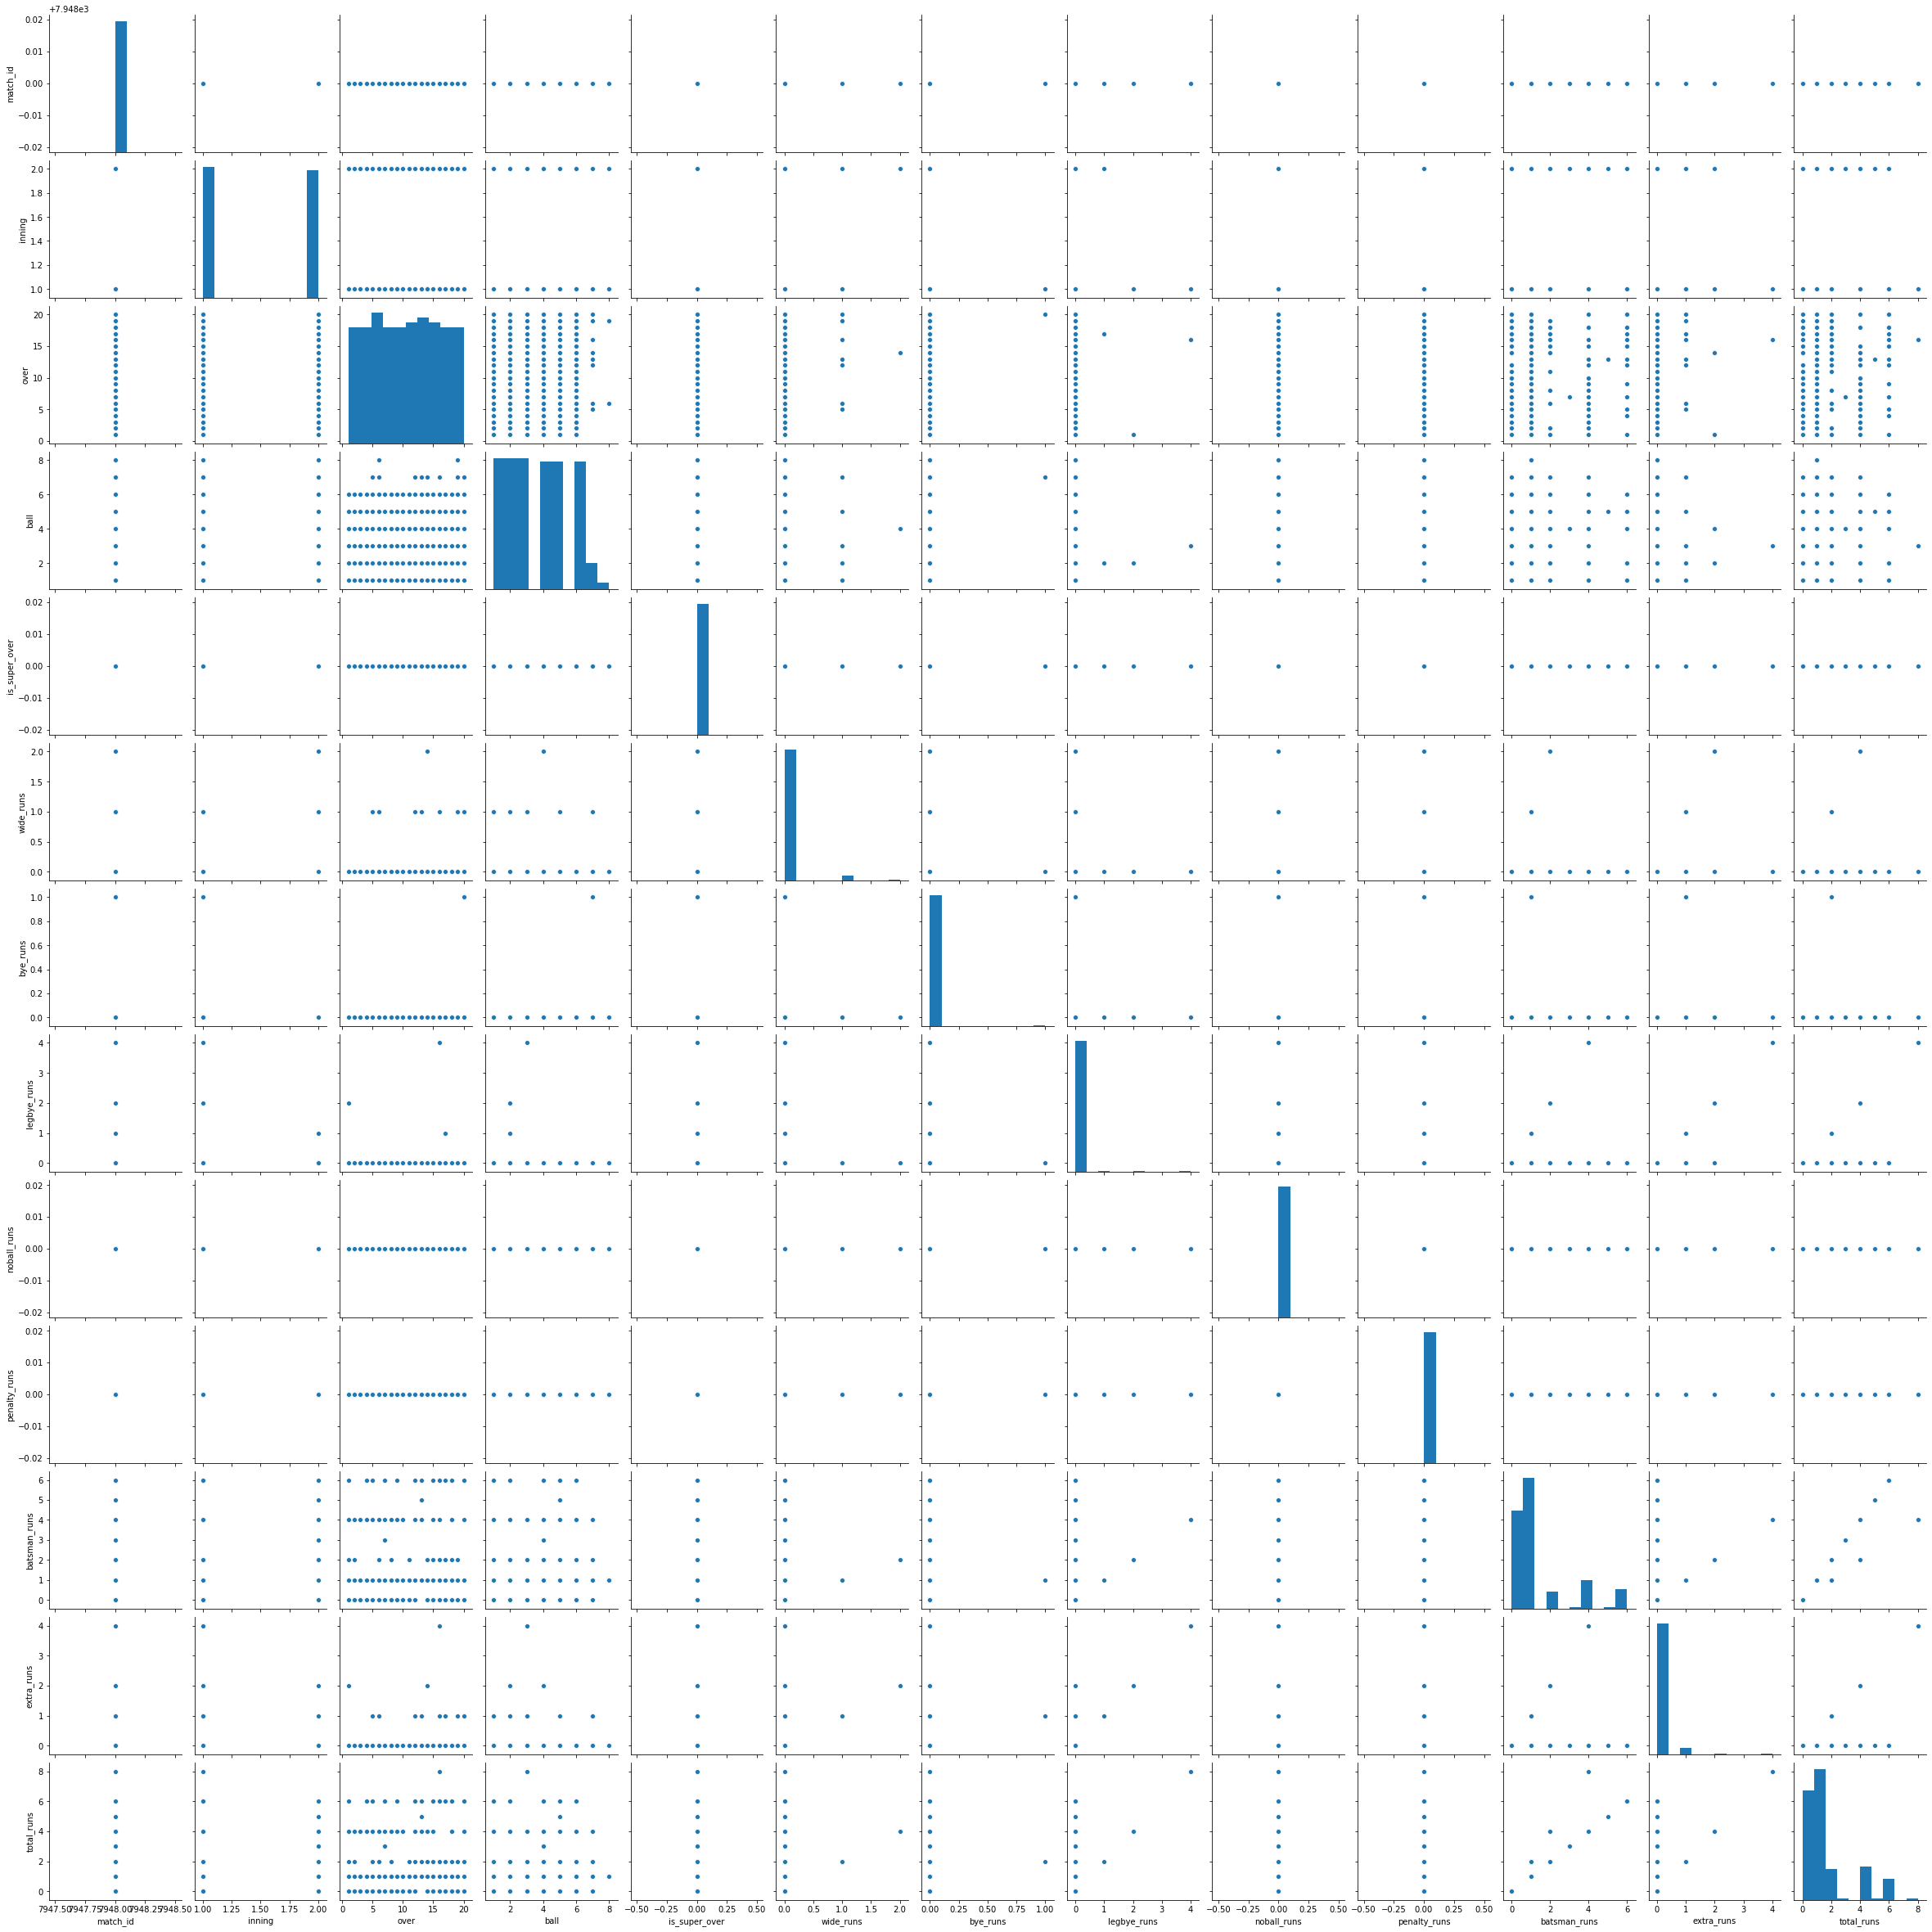

In [27]:
sns.pairplot(delivery)

# Rohit Sharma against other teams

In [30]:
name = 'RG Sharma'
batsman = delivery[delivery['batsman'] == name]
batsman.head(4)

,match_id,inning,batting_team,bowling_team,over,ball,batsman,non_striker,bowler,is_super_over,...,bye_runs,legbye_runs,noball_runs,penalty_runs,batsman_runs,extra_runs,total_runs,player_dismissed,dismissal_kind,fielder
186,7948,2,Mumbai Indians,Delhi Daredevils,10,6,RG Sharma,HH Pandya,S Lamichhane,0,...,0,0,0,0,1,0,1,NaN,NaN,NaN
187,7948,2,Mumbai Indians,Delhi Daredevils,11,1,RG Sharma,HH Pandya,A Mishra,0,...,0,0,0,0,1,0,1,NaN,NaN,NaN
191,7948,2,Mumbai Indians,Delhi Daredevils,11,5,RG Sharma,HH Pandya,A Mishra,0,...,0,0,0,0,1,0,1,NaN,NaN,NaN
196,7948,2,Mumbai Indians,Delhi Daredevils,12,4,RG Sharma,HH Pandya,S Lamichhane,0,...,0,0,0,0,1,0,1,NaN,NaN,NaN


In [31]:
rohit_dc = batsman[['batting_team','bowling_team','batsman','total_runs']]
rohit_dc.head()

,batting_team,bowling_team,batsman,total_runs
186,Mumbai Indians,Delhi Daredevils,RG Sharma,1
187,Mumbai Indians,Delhi Daredevils,RG Sharma,1
191,Mumbai Indians,Delhi Daredevils,RG Sharma,1
196,Mumbai Indians,Delhi Daredevils,RG Sharma,1
200,Mumbai Indians,Delhi Daredevils,RG Sharma,2


# About Rabada

In [35]:
name = 'K Rabada'
bowler = delivery[delivery['bowler'] == name]

bowler = bowler[['bowler','dismissal_kind']].reset_index().drop(['index'], axis=1)
print(bowler)

Empty DataFrame
Columns: [bowler, dismissal_kind]
Index: []


In [37]:
matches_result = matches[['team1','team2','winner']]
matches_result.head()

,team1,team2,winner
698,Delhi Capitals,Mumbai Indians,Delhi Capitals
729,Mumbai Indians,Delhi Capitals,Mumbai Indians


In [38]:
matches_result['lost'] = matches_result.apply(lambda x:   (x['team2'] if x['team1'] == x['winner'] else x['team1']), axis = 1)

<ipython-input-38-0d1c9e5806ce>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  matches_result['lost'] = matches_result.apply(lambda x:   (x['team2'] if x['team1'] == x['winner'] else x['team1']), axis = 1)


In [40]:
matches_result.head(2)

,team1,team2,winner,lost
698,Delhi Capitals,Mumbai Indians,Delhi Capitals,Mumbai Indians
729,Mumbai Indians,Delhi Capitals,Mumbai Indians,Delhi Capitals


In [42]:
teju = matches.corr()

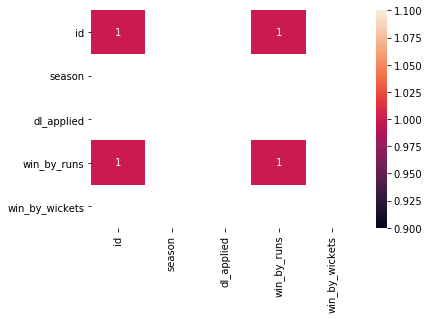

In [43]:
sns.heatmap(teju,annot = True)

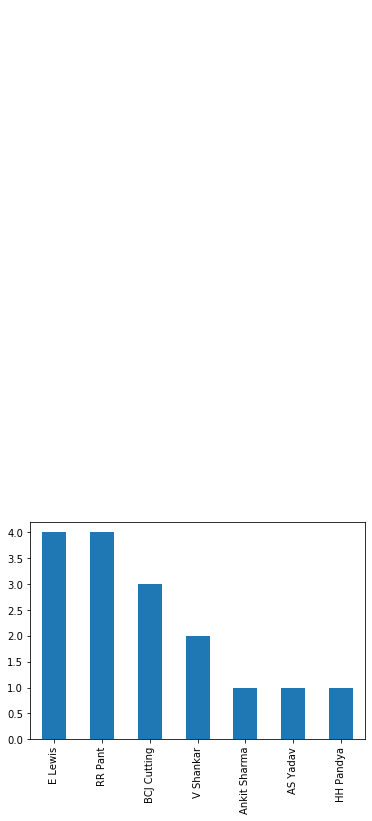

In [44]:
#--> Player that has scored the most number of sixes
ax=delivery[delivery['batsman_runs']==6].batsman.value_counts()[:10].plot.bar()
for p in ax.patches:
    ax.annotate(format(p.get_height()), (p.get_x(), p.get_height()+10))
mlt.show()

# THANK YOU